# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [3]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


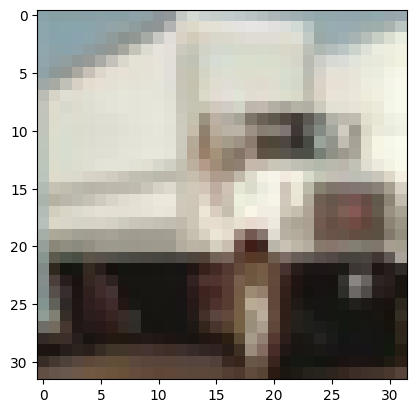

In [4]:
print(y_train[444])
plt.imshow(x_train[444]);

In [5]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [6]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

<br><br><br>

Build a CNN using Keras Sequential

In [9]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                        

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [9]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15



1563/1563 [==============================] - 8s 4ms/step - loss: 1.7149 - accuracy: 0.3750 - val_loss: 1.5263 - val_accuracy: 0.4624
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4464 - accuracy: 0.4792 - val_loss: 1.4438 - val_accuracy: 0.4741
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3608 - accuracy: 0.5180 - val_loss: 1.2713 - val_accuracy: 0.5460
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3083 - accuracy: 0.5407 - val_loss: 1.2676 - val_accuracy: 0.5577
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2781 - accuracy: 0.5529 - val_loss: 1.6191 - val_accuracy: 0.4387
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2632 - accuracy: 0.5617 - val_loss: 1.2477 - val_accuracy: 0.5778
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2480 - accuracy: 0.5698 - val_loss: 1.1907 - val_accuracy: 0.5871
Epo

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [10]:
## Building a model with the pattern above
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

| Model_1 | Model_2 |
| :-: | :-: |
| 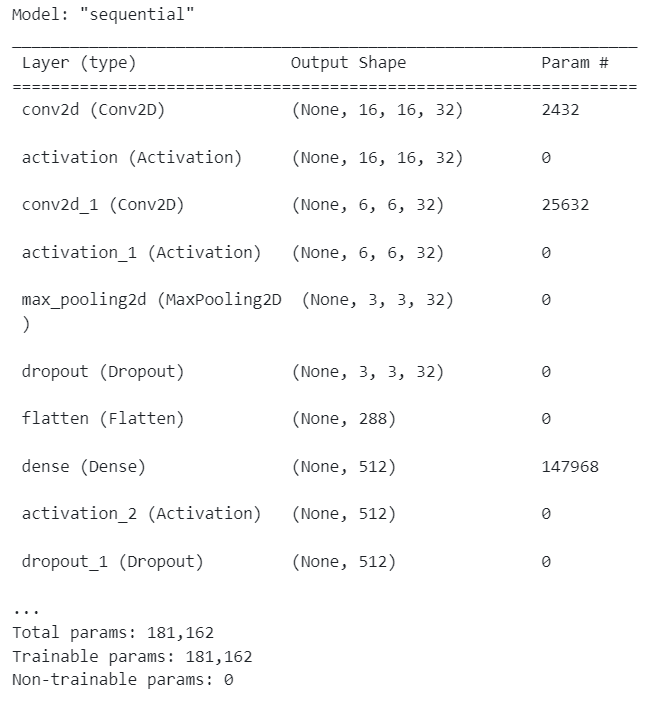 | 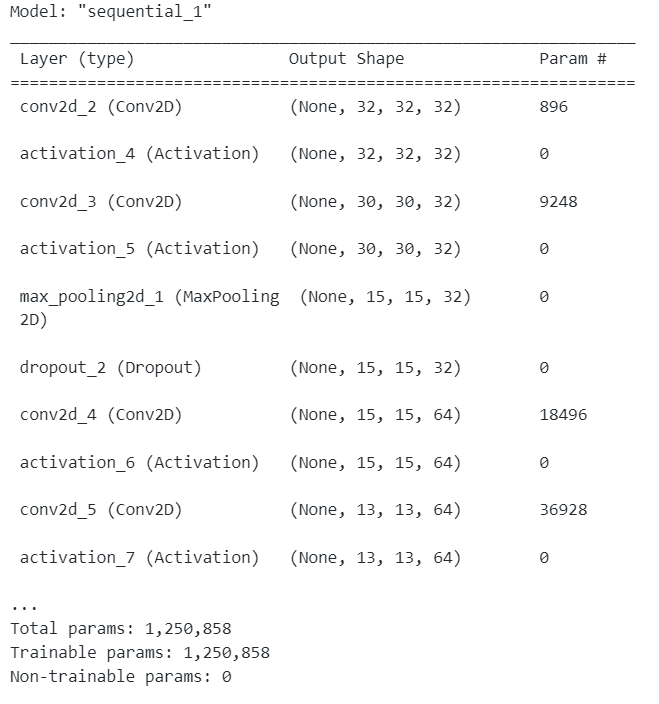 |

<br><br><br>

In [11]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5392 - accuracy: 0.4438 - val_loss: 1.4760 - val_accuracy: 0.4853
Epoch 2/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1225 - accuracy: 0.6064 - val_loss: 0.9489 - val_accuracy: 0.6758
Epoch 3/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9760 - accuracy: 0.6619 - val_loss: 0.8568 - val_accuracy: 0.7037
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9161 - accuracy: 0.6842 - val_loss: 0.8893 - val_accuracy: 0.6940
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8897 - accuracy: 0.6977 - val_loss: 0.9299 - val_accuracy: 0.6901


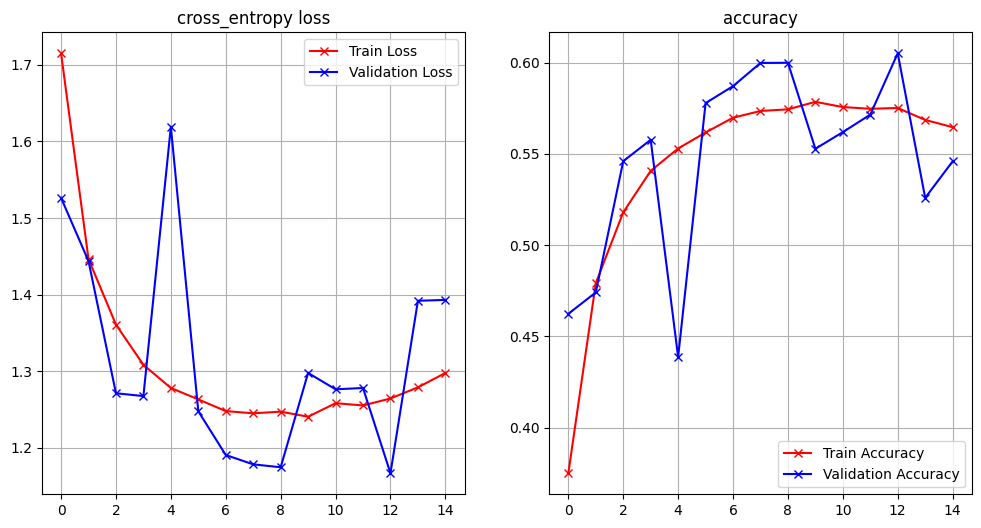

In [13]:
plot_loss_accuracy(history_1)

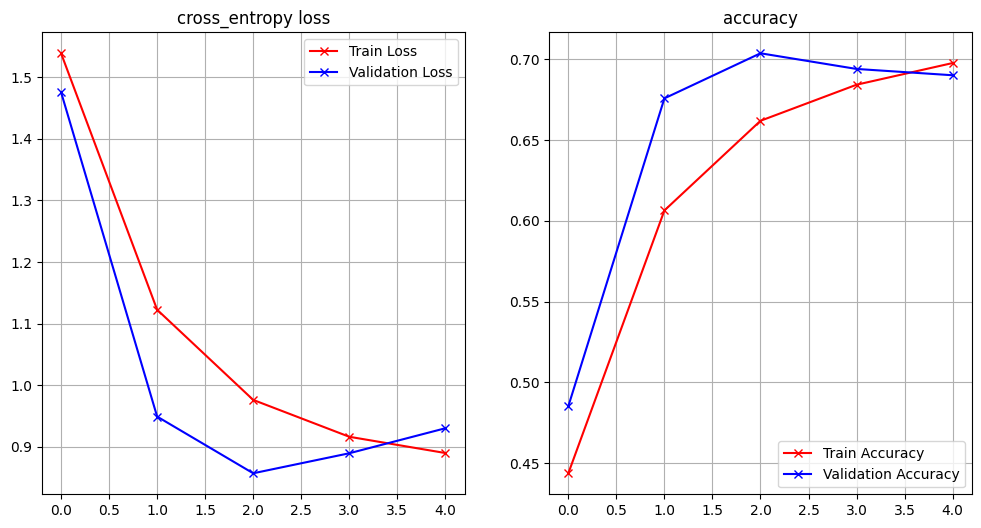

In [14]:
plot_loss_accuracy(history_2)

In [22]:
## Using 5 epochs and a different structure

model_3 = Sequential()

model_3.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model_3.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(200, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(Conv2D(128, (4, 4), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(50, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())

model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 512)       14336     
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 256)       1179904   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 256)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 200)       461000    
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 128)       409728    
                                                      

In [25]:
model_3.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.00047),
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
              batch_size=32,
              epochs=15,
              verbose=1,
              shuffle=True,
              callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=2)],
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 109s 69ms/step - loss: 1.7798 - accuracy: 0.3262 - val_loss: 1.3416 - val_accuracy: 0.5015
Epoch 2/15
1563/1563 [==============================] - 107s 68ms/step - loss: 1.3078 - accuracy: 0.5235 - val_loss: 1.0748 - val_accuracy: 0.6057
Epoch 3/15
1563/1563 [==============================] - 107s 68ms/step - loss: 1.0983 - accuracy: 0.6100 - val_loss: 0.9386 - val_accuracy: 0.6650
Epoch 4/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.9536 - accuracy: 0.6651 - val_loss: 0.8334 - val_accuracy: 0.7093
Epoch 5/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.8690 - accuracy: 0.6963 - val_loss: 0.7551 - val_accuracy: 0.7347
Epoch 6/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7870 - accuracy: 0.7267 - val_loss: 0.7136 - val_accuracy: 0.7562
Epoch 7/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.7253 - accuracy: 0.7494 - val_loss: 0

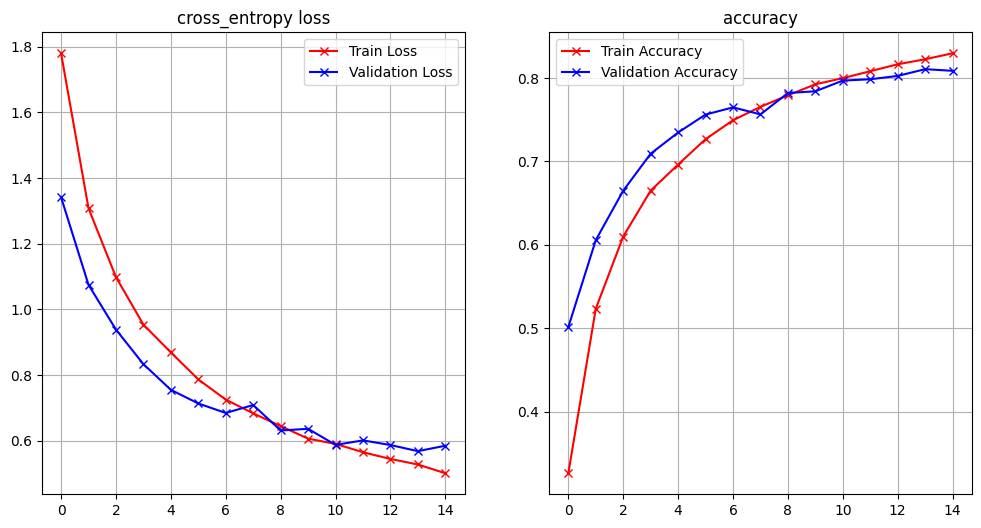

In [26]:
plot_loss_accuracy(history_3)

In [23]:
import gc

#### Conclusion

***During the activity I was able to get the concept of how convulution works***